# Import the packages

In [1]:
import os

from fastai.vision.all import *
from fastai.vision import *

import pandas as pd

# Convert the dataset into Imagenet style

In [2]:
DATASET_PATH = '/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages'
DATASET_PATH_Train = '/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Train_Color'
DATASET_PATH_Val = '/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Val_Color'
DATASET_PATH_Test = '/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Test_Color'

In [3]:
class_names = []
for folder_name in os.listdir(DATASET_PATH_Train):
    if not folder_name.endswith('.csv'):
        class_names.append(folder_name)

In [4]:
class_names

['Cat', 'Dog']

In [5]:
image_paths_train = []
labels_train = []

for i in range(len(class_names)):
    class_name = class_names[i]
    image_names = os.listdir(f'{DATASET_PATH_Train}/{class_name}')
    for image_name in image_names:
        image_path = f'{DATASET_PATH}/{class_name}/{image_name}'
        image_paths_train.append(image_path)
        labels_train.append(i)
    

In [6]:
df_train = pd.DataFrame(
    {
        'name': image_paths_train,
        'label': labels_train
    }
)

In [7]:
df_train.head()

,name,label
0,/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Cat/0.jpg,0
1,/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Cat/1.jpg,0
2,/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Cat/10.jpg,0
3,/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Cat/100.jpg,0
4,/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Cat/1000.jpg,0


In [8]:
df_train.tail()

,name,label
21991,/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Dog/9995.jpg,1
21992,/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Dog/9996.jpg,1
21993,/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Dog/9997.jpg,1
21994,/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Dog/9998.jpg,1
21995,/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Dog/9999.jpg,1


In [9]:
df_train.to_csv(
    path_or_buf=f'{DATASET_PATH_Train}/labels.csv',
    index=False
)

In [11]:
image_paths_val = []
labels_val = []

for i in range(len(class_names)):
    class_name = class_names[i]
    image_names = os.listdir(f'{DATASET_PATH_Val}/{class_name}')
    for image_name in image_names:
        image_path = f'{DATASET_PATH}/{class_name}/{image_name}'
        image_paths_val.append(image_path)
        labels_val.append(i)


df_val = pd.DataFrame(
    {
        'name': image_paths_val,
        'label': labels_val
    }
)

df_val.to_csv(
    path_or_buf=f'{DATASET_PATH_Val}/labels.csv',
    index=False
)

In [12]:
image_paths_test = []
labels_test = []

for i in range(len(class_names)):
    class_name = class_names[i]
    image_names = os.listdir(f'{DATASET_PATH_Test}/{class_name}')
    for image_name in image_names:
        image_path = f'{DATASET_PATH}/{class_name}/{image_name}'
        image_paths_test.append(image_path)
        labels_test.append(i)


df_val = pd.DataFrame(
    {
        'name': image_paths_test,
        'label': labels_test
    }
)

df_val.to_csv(
    path_or_buf=f'{DATASET_PATH_Test}/labels.csv',
    index=False
)

# Load the data

In [18]:
dls = ImageDataLoaders.from_folder(
    path=DATASET_PATH,
    train = 'Train_Color',
    valid = 'Val_Color',
    test = 'Test_Color',
    item_tfms=Resize(224),
    bs=16,
    batch_tfms=[Normalize.from_stats(*imagenet_stats), RandTransform()],
    device = 'cuda'
)

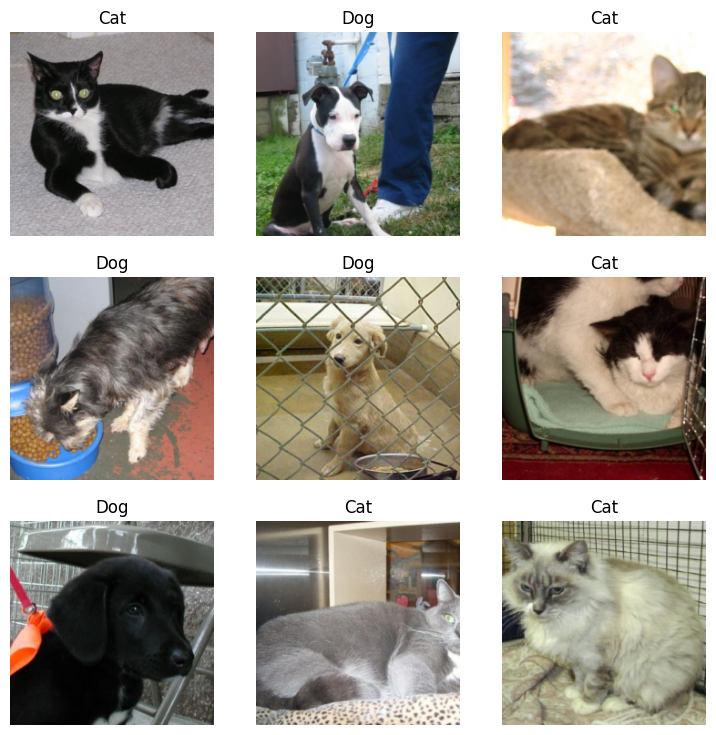

In [19]:
dls.show_batch()

# Create a model

In [20]:
import torch
print(torch.cuda.is_available())

True


In [21]:
model = vision_learner(
    dls=dls,
    arch=models.resnet50,
    metrics=[accuracy, error_rate]
)
model.to('cuda') 
print(next(model.model.parameters()).device)

cuda:0


In [22]:
model.fine_tune(
    epochs=1
)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.115958,0.042494,0.985993,0.014007,01:14


/home/ryan/anaconda3/envs/wildcam/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:890: UserWarning: Truncated File Read
  warnings.warn(str(msg))


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.052660,0.019327,0.993497,0.006503,01:43


/home/ryan/anaconda3/envs/wildcam/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:890: UserWarning: Truncated File Read
  warnings.warn(str(msg))


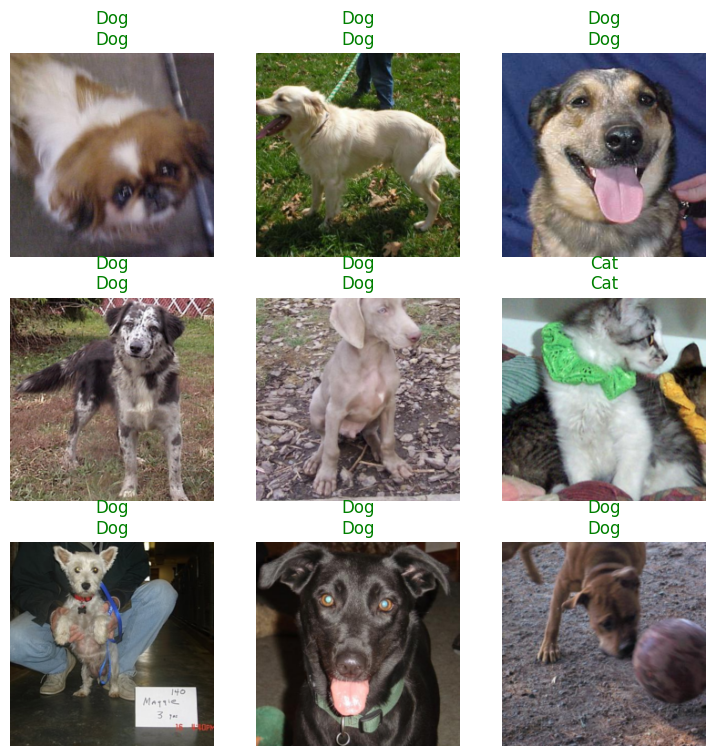

In [23]:
model.show_results()

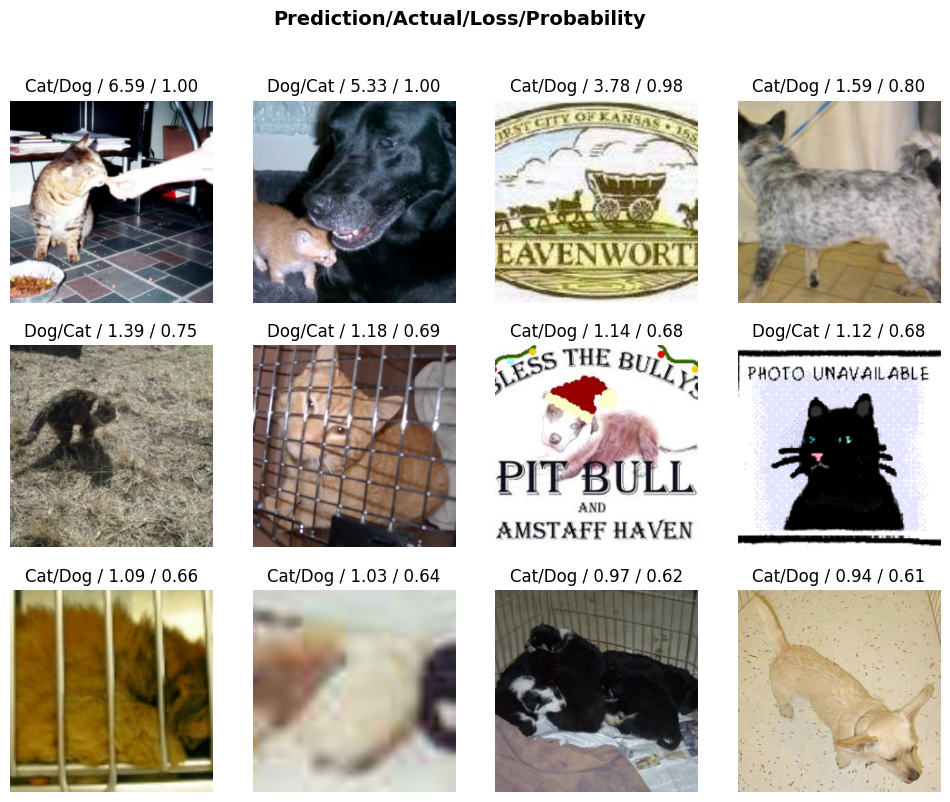

In [24]:
interp = Interpretation.from_learner(model)
interp.plot_top_losses(k=12)

# Save the model

In [25]:
model.export(f'{DATASET_PATH}/catdog_color_classifier_1.pkl')

# Load the model

In [2]:
new_model = load_learner(f'{DATASET_PATH}/catdog_color_classifier_1.pkl')

NameError: name 'load_learner' is not defined

# Predict from the loaded model

In [1]:
val_results = new_model.validate(dl=dls.valid)
print("Validation set results:")
print(f" - Loss: {val_results[0]}")
print(f" - Accuracy: {val_results[1]}")

NameError: name 'new_model' is not defined

In [40]:
train_results = new_model.validate(dl=dls.train)
print("Train set results:")
print(f" - Loss: {train_results[0]}")
print(f" - Accuracy: {train_results[1]}")

In [38]:
dls_test = ImageDataLoaders.from_folder(
    path=DATASET_PATH,
    train = 'Train_Color',
    valid = 'Test_Color',
    item_tfms=Resize(224),
    bs=16,
    batch_tfms=[Normalize.from_stats(*imagenet_stats), RandTransform()],
    device = 'cuda'
)

In [39]:
test_results = new_model.validate(dl=dls_test.valid)
print("Test set results:")
print(f" - Loss: {test_results[0]}")
print(f" - Accuracy: {test_results[1]}")

Test set results:
 - Loss: 0.012978407554328442
 - Accuracy: 0.9940000176429749
